In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#导入数据
data=load_breast_cancer()

In [7]:
rfc=RandomForestClassifier(n_estimators=50,random_state=20)
score_pre=cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9631265664160402

0.968421052631579 61


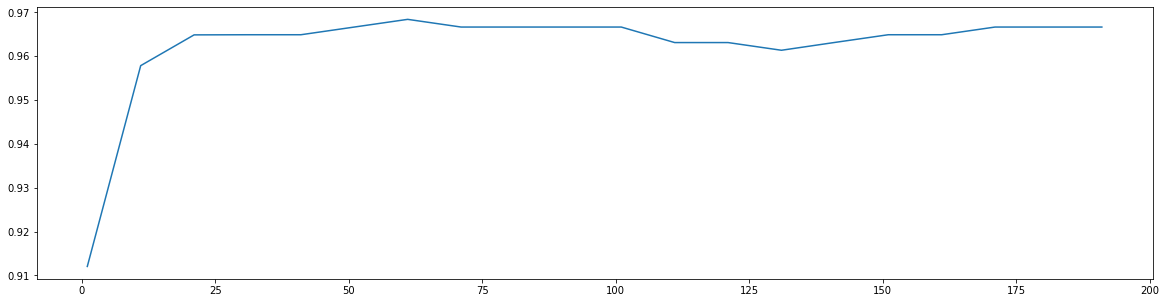

In [12]:
scorel=[]
for i in range(0,200,10):
    rfc=RandomForestClassifier(n_estimators=i+1
                              ,n_jobs=-10
                              ,random_state=20
                              )
    score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)#返回最大的分数，以及这个分数对应的n_estimators的取值
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()
#通过这个结果我们发现大概在n_estimators=61左右会有最大值

0.968421052631579 59


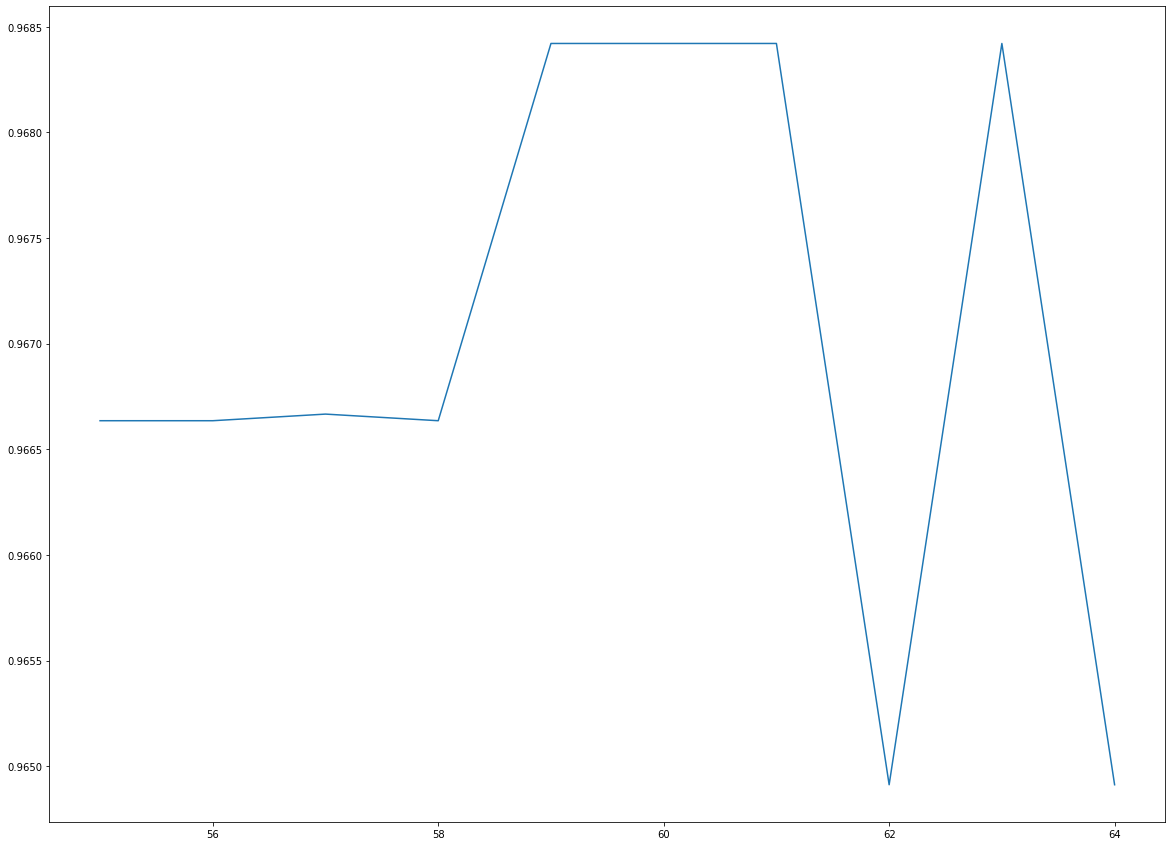

In [16]:
#接下来进一步细化学习曲线
scorel=[]
for i in range(55,65):
    rfc=RandomForestClassifier(n_estimators=i
                              ,n_jobs=-1
                              ,random_state=20
                              )   
    score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(55,65)][scorel.index(max(scorel))]))
#加上[*range(55,65)]就是取到这个索引所对应的值
#[*range(55,65)]---->[55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
plt.figure(figsize=[20,15])
plt.plot(range(55,65),scorel)
plt.show()
    

In [18]:
#确定好了n_estimators=59之后，进一步使用网格搜索调整参数
#为什么不能直接用网格搜索，而是先确定了n_estimators
#答：如果直接网格搜索，则运行时间很长；网格搜索的这个组合我们也无法理解是怎么来的，所以即便网格搜索的结果不好，我们也不知道该怎么改 便

In [19]:
#开始调整参数，首先调整max_depth
#s数据少的可以选择1-10或者1-20，数据很大的直接30-50
param_grid={'max_depth':np.arange(1,20,1)}
rfc=RandomForestClassifier(n_estimators=59
                          ,random_state=20
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'max_depth': 9}

In [20]:
GS.best_score_

0.968421052631579

In [21]:
#发现更改max_depth并没有提高分数，那么，max_depth就不改了，继续看看其他参数怎么样

In [23]:
param_grid={'max_features':np.arange(5,30,1)}
rfc=RandomForestClassifier(n_estimators=59
                          ,random_state=20
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'max_features': 5}

In [25]:
GS.best_score_

0.968421052631579

In [30]:
#仍然没有变化，那么基本上提升的空间没有了 
#再试试min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1,10+1,1)}
rfc=RandomForestClassifier(n_estimators=59
                          ,random_state=20
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'min_samples_leaf': 1}

In [31]:
GS.best_score_

0.968421052631579

In [32]:
#依然没有变化
#试试min_samples_split
param_grid={'min_samples_split':np.arange(2,2+20,1)}
rfc=RandomForestClassifier(n_estimators=59
                          ,random_state=20
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'min_samples_split': 2}

In [33]:
GS.best_score_

0.968421052631579

In [34]:
#还是没有变化，最后再试试criterion
param_grid={'criterion':['gini','entropy']}
rfc=RandomForestClassifier(n_estimators=59
                          ,random_state=20
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'criterion': 'gini'}

In [35]:
GS.best_score_

0.968421052631579

In [37]:
#没有变化，最后总结最佳参数。因为上面的都没有提升，所以最佳参数只需要把n_estimators=59加上就可以了
rfc=RandomForestClassifier(n_estimators=59,random_state=20)
score=cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.968421052631579

In [38]:
score - score_pre

0.005294486215538741